### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [22]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.ffill() #df_comp.fillna(method='ffill')



### Removing Surplus Data

In [23]:
df_comp['market_value']=df_comp.spx

In [24]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [25]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [26]:
#df['wn'] = wn
df.loc[:,'wn'] = wn

C:\Users\grego\AppData\Local\Temp\ipykernel_3244\1553362457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'wn'] = wn


In [27]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1091.947920
std,292.559287,289.221169
min,438.920000,70.985346
25%,914.620000,897.590565
50%,1144.650000,1091.140837
75%,1316.280729,1283.738358
max,1570.252238,2118.240464


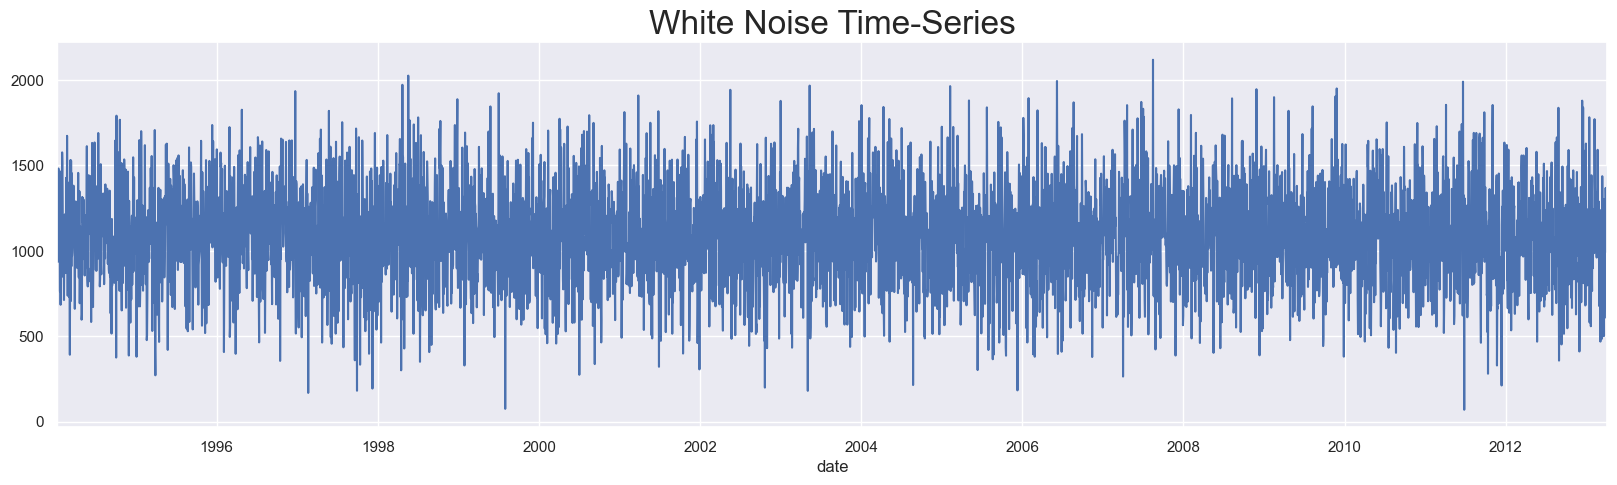

In [28]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

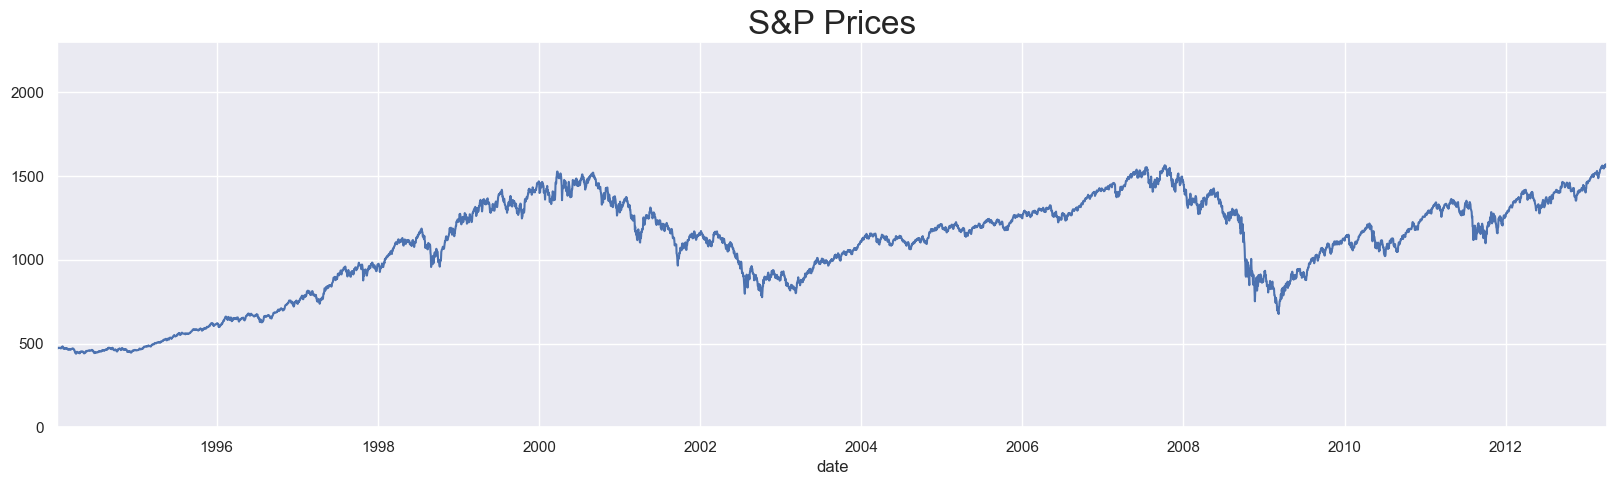

In [29]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

### Random Walk

In [30]:
rw = pd.read_csv("RandWalk.csv")


In [31]:
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [32]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)


In [33]:
rw.set_index("date", inplace = True)


In [34]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-08,1135.238562
1994-01-09,1109.897831
1994-01-10,1080.347860
1994-01-11,1082.095245


In [35]:
rw = rw.asfreq('b')

In [36]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [38]:
#df['rw'] = rw.price
df.loc[:,'rw'] = rw.price

In [39]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1424.181948,1122.139662
1994-01-10,475.27,1139.280300,1080.347860
1994-01-11,474.13,935.836747,1082.095245
1994-01-12,474.17,1444.089356,1083.639265
1994-01-13,472.47,1482.104170,1067.146255


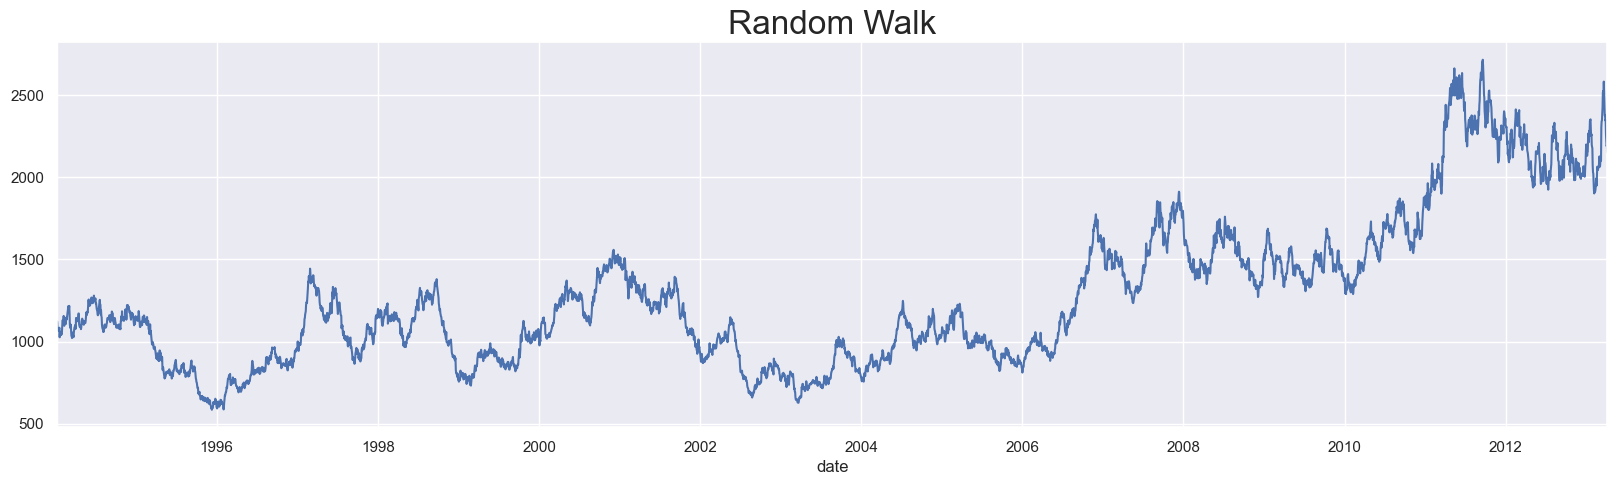

In [40]:
df.rw.plot(figsize = (20,5))
plt.title("Random Walk", size = 24)
plt.show()

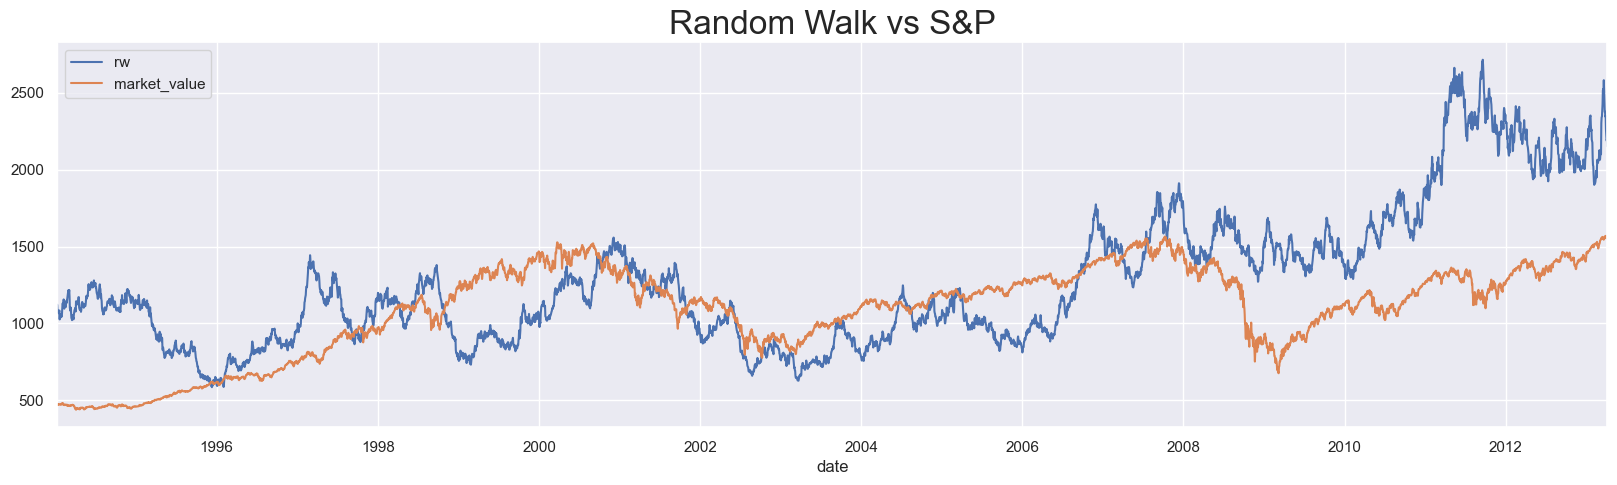

In [41]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.legend() 
plt.show()

### Metodo Deke-Fuller  sts.adfuller(dataframe) Python
- Retorno
  - adf:The test statistic.

  - pvalue: MacKinnon’s approximate p-value based on MacKinnon (1994, 2010).

  - usedlag: The number of lags used

  - nobs: The number of observations used for the ADF regression and calculation of the critical values

  - icbest: The maximized information criterion if autolag is not None.

  - resstore: Result Store, optional A dummy class with results attached as attributes

In [42]:
sts.adfuller(df.market_value)

(np.float64(-1.7369847452352436),
 np.float64(0.4121645696770623),
 18,
 5002,
 {'1%': np.float64(-3.431658008603046),
  '5%': np.float64(-2.862117998412982),
  '10%': np.float64(-2.567077669247375)},
 np.float64(39904.880607487445))

El valor_test_std > valor_critico para los niveles de significación de 1%, 5% y 10%, por lo que se acepta la hiposis nula para cualquier de estos niveles de significación.

In [43]:
sts.adfuller(df.wn)

(np.float64(-69.92856192185204),
 0.0,
 0,
 5020,
 {'1%': np.float64(-3.431653316130827),
  '5%': np.float64(-2.8621159253018247),
  '10%': np.float64(-2.5670765656497516)},
 np.float64(70699.42596375174))

El valor_test_std < valor_critico para los niveles de significación de 1%, 5% y 10%, por lo que se rechaza la hiposis nula para cualquier de estos niveles de significación, así la seríe es estacionaría. Ademas el $p-value$ es menor para todos los niveles de significancia.

In [44]:
sts.adfuller(df.rw)


(np.float64(-1.3286073927689719),
 np.float64(0.6159849181617385),
 24,
 4996,
 {'1%': np.float64(-3.4316595802782865),
  '5%': np.float64(-2.8621186927706463),
  '10%': np.float64(-2.567078038881065)},
 np.float64(46299.333497595144))

El valor_test_std > valor_critico para los niveles de significación de 1%, 5% y 10%, por otra parte vemos que el p-valor es mayor que los niveles de significancia del $1%$ y $5%$, por lo que no podemos conluir si es o no es estacionaria la seríe de caminata aleatoría.

### Seasonality

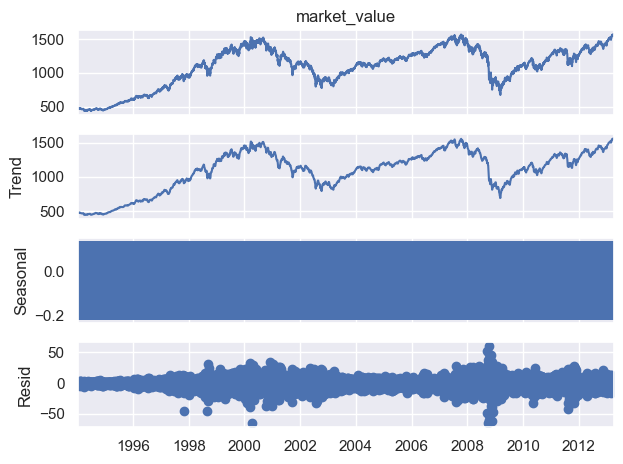

In [ ]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive") #utiliza los valores del periodo anterior como un marcador de tendencia.
s_dec_additive.plot()
plt.show()

No se observa un patron ciclico concreto como se observa en en la componente estacional, en los residuos podemos ver que los periodos varian durante el cambio del siglo 19 al 20 y alrrededor edl 2008. en general los resultados de la descomposición sugieren que no hay estacionalidad en la serie.
- La variable estacional explica la mayor parte de la varibilidad de los datos.
- Los Residuos son los errores de las estimaciones del modelo, $v_{real}-v_{predic}$

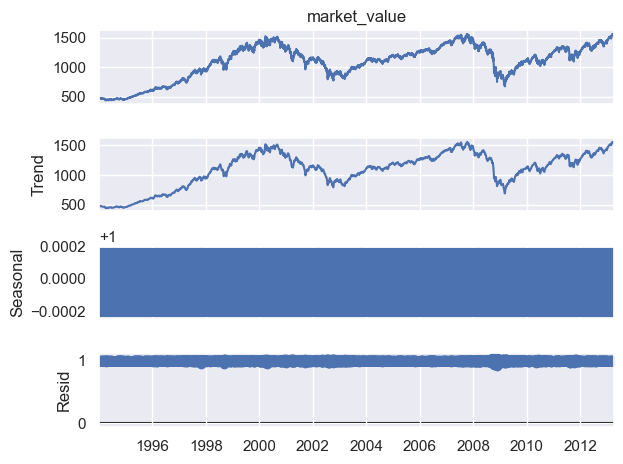

In [53]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF

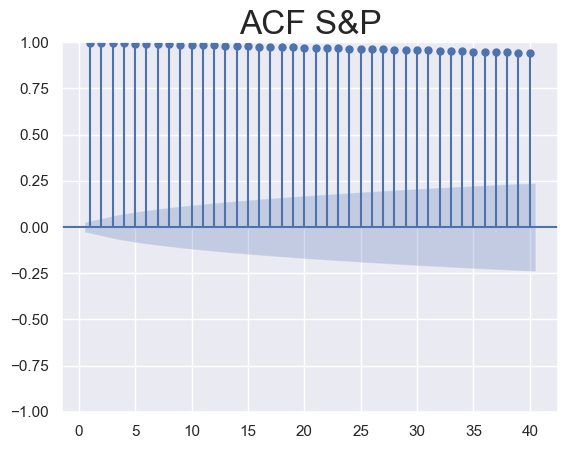

In [54]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

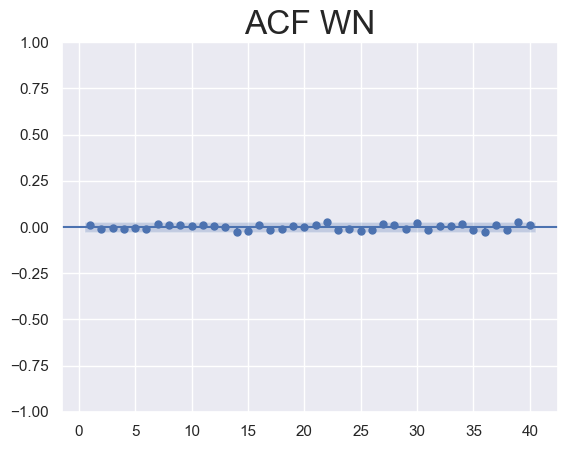

In [ ]:
sgt.plot_acf(df.wn, lags = 40, zero = False)#distinguir ruido blanco de la serie
plt.title("ACF WN", size = 24)
plt.show()

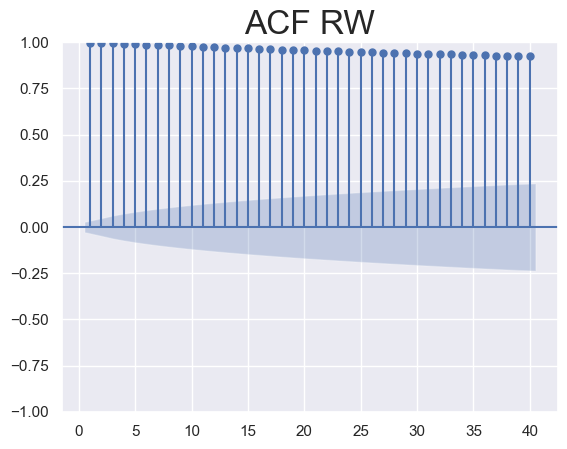

In [57]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

### PACF

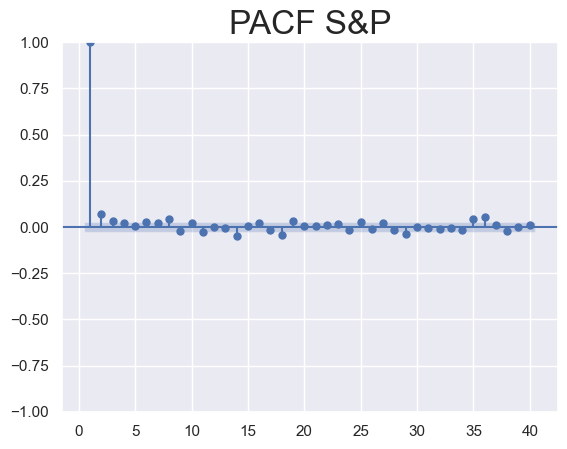

In [58]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

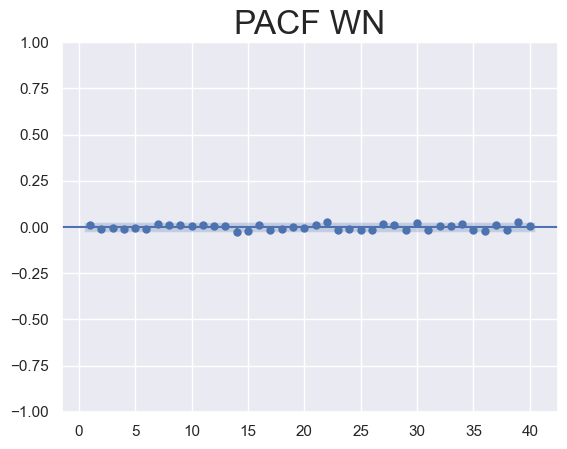

In [59]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

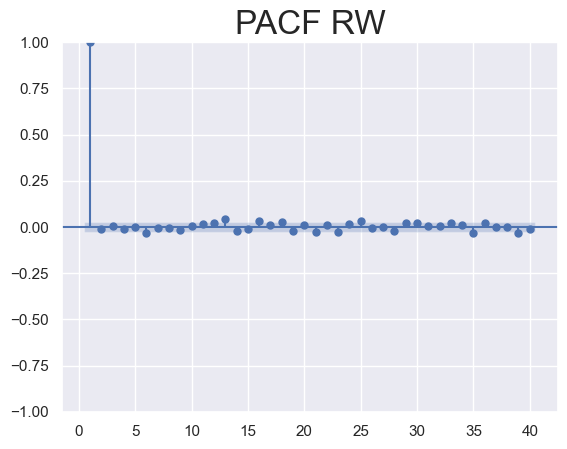

In [60]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF RW", size = 24)
plt.show()